# Tabulación de datos faltantes

Tabular es expresar valores, magnitudes u otro datos por medio de tablas.

Imagina que tenemos lo datos de la encuesta de la primera clase.

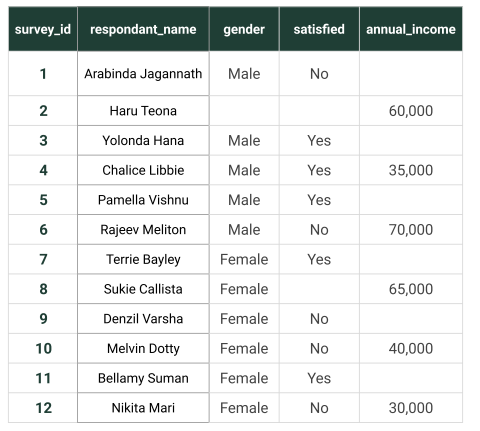

Cuando comenzamos a explorar datos faltantes, es importante comenzar con preguntas muy simples.

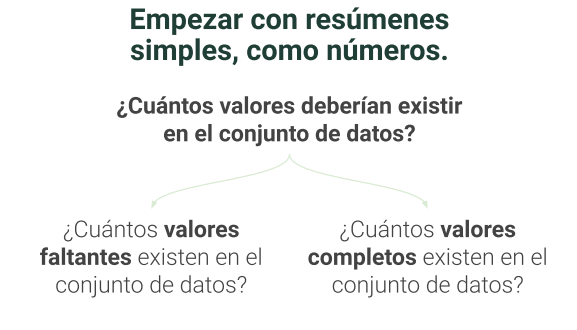

Por ejemplo preguntas que regresen un único número 
1. ¿Cuantos valores deberían existir en el conjunto de datos?
2.  ¿Cuántos valores faltantes existen en el conjunto de datos?
3.  ¿Cuántos valores completos existen en el conjunto de datos?

Estas preguntas son complementarias y podemos contestarlas con los datos que me faltan o con los que tengo. En este caso como estamos abordando **valores faltantes**, vamos a proseguir por este camino. 

Una vez definido eso, vamos a realizar lo siguiente:

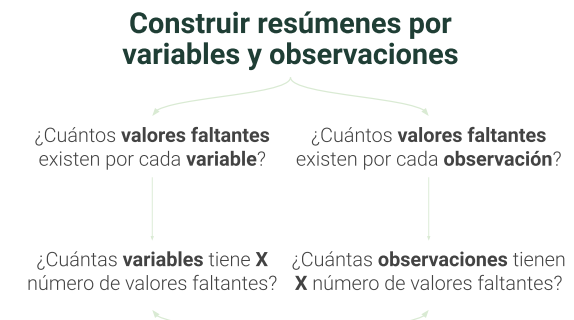

Recordemos que las **variables** son las columnas y que las **observaciones** son las filas o las muestras que tomamos.

Así podemos visualizar en que **variable** u **observación** se están acumulando mis valores faltantes.

Entonces una vez que hemos formulado preguntas básicas, tendremos que ir un paso más allá yendo a preguntas que involucren el negocio o area de negocio en la que estamos involucrados al realizar el análisis.

Por ejemplo cuando tengamos **series de tiempo** podremos preguntarnos ¿qué esta pasando semana a semana, mes a mes, año a año y así sucesivamente? Formulando la pregunta de la izquierda, para saber **X pasos** o pregunta como; ¿cuál es mi racha de valores completos y faltantes en una variable? Así podemos analizar que pudo pasar en determinado tiempo que tuvo el comportamiento de racha a traves del tiempo, de esta manera podemos ampliar nuestro conocimiento.

Vamos a poner manos a la obra.

## Usando riskfactors

### Importando librerías

In [1]:
import janitor      #Crear pipelines de limpieza de datos
import matplotlib.pyplot as plt
import missingno    #Visualizar valores faltantes 
import numpy as np
import pandas as pd
import pyreadr      #Leer archivos adr para este curso
import seaborn as sns
import session_info
import upsetplot    #Para gráfica de relaciones 
                    #de nuestros valores faltantes

### Configurar el aspecto general de las gráficas del proyecto

In [2]:
%matplotlib inline

sns.set(
    rc={
        "figure.figsize": (10, 10)
    }
)

sns.set_style("whitegrid")

### Leer conjunto de datos

In [3]:
#Cargar conjunto de datos
riskfactors = pyreadr.read_r('dataset/riskfactors.rda')

#Convertirlo a Data Frame
riskfactors_df = next(iter(riskfactors.values()))

#Borrar el diccionario
del riskfactors

In [4]:
#Verificar tipo 
#type(riskfactors_df)

#LLamar al data frame
riskfactors_df.head()

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,No,NaN,NaN,NaN,1095,261,104,156,521,12
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,No,NaN,NaN,NaN,52,209,52,0,52,0
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,No,NaN,NaN,NaN,36,156,52,24,24,24
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Yes,Everyday,Yes,NaN,-7,261,209,261,365,104


Obtengamos la primera tabulación de valores faltantes con la siguiente linea:

In [5]:
riskfactors_df.isna()

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
241,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
242,False,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
243,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False


## Resúmenes básicos de valores faltantes

In [6]:
#¿Cuantos datos tengo?
riskfactors_df.size

#¿Cuantas filas y columnas tengo?
riskfactors_df.shape

(245, 34)

Ahora sabemos que tengo **34 variables** y **245 observaciones**. ¿Pero ahora podemos preguntarnos cuantas observaciones están completas y cuantas son faltantes?. Para eso nosotros podemos hacer uso de la extensión que nosotros hemos creado previamente con el nombre de `pandas-missing-extension-re`. Hagamoslo:

In [18]:
#Correr extension de Pandas nuevav2
%run pandas-missing-extension-re2.py

In [8]:
#Valores completos que tenemos
riskfactors_df.missing.number_complete()

7144

Eso quiere decir que tenemos como 1000 valores faltantes ¿cómo lo podemos saber?

In [9]:
riskfactors_df.missing.number_missing()

1186

Entonces tenemos **1186** valores faltantes. Hasta aquí toda va perfecto.

Ahora vamos a tabular los valores faltantes. Comenzaremos con la tabulación de los valores faltantes en **variables o columnas**

## Variables / Columnas

In [10]:
#usaremos un resumen de valores faltantes de variable
riskfactors_df.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,state,0,245,0.000000
1,sex,0,245,0.000000
2,age,0,245,0.000000
3,weight_lbs,10,245,4.081633
4,height_inch,2,245,0.816327
5,bmi,11,245,4.489796
6,marital,1,245,0.408163
7,pregnant,215,245,87.755102
8,children,0,245,0.000000
9,education,1,245,0.408163


En la tabla anterior tenemos 4 columnas que contiene nuestro conjunto de datos:
1. variable: Nos da la cantidad de variables que tenemos con sus respectivos nombres.
2. n_missing: Representa cuantos valores faltantes hay para cada columna o variable.
3. n_cases: Cantidad total de observaciones faltantes, es decir cuantas filas presentan faltantes.
4. pct_missing: Nos data el porcentaje respectivo de cada variable con referencia a **n_case**.

Por ejemplo tenemos que la variable **sex, state, age** tiene **0 observaciones con valores faltantes**, por otro lado tenemos la variable **pregnant** con **215 valores faltantes**. Podemos preguntarnos ¿qué tanto es? Pues bien es lo veremos en la 4ta columna que es el porcentaje con respecto de valores faltantes. En nuestro caso representa **87.75 %**, es decir del total de valores faltantes la gran parte está concentrado en esta variable. Algo puede suceder aquí y podríamos continuar explorando que está sucediendo.


### Agrupando
Podemos también agrupar nuestros resultados, con la siguiente función.

In [11]:
#generar una tabla de valores faltantes
riskfactors_df.missing.missing_variable_table()

,n_missing_in_variable,n_variables,pct_variables
0,0,10,29.411765
1,8,6,17.647059
2,2,4,11.764706
3,3,3,8.823529
4,1,2,5.882353
5,10,1,2.941176
6,11,1,2.941176
7,113,1,2.941176
8,128,1,2.941176
9,134,1,2.941176


En esta tabla tenemos 3 columnas:

1. **n_missing_in variable**: Esto nos dice la cantidad de valores faltantes dentro de una **columna o variable**.
2. **n_variables**: Después tenemos el número de variables que poseen los valores faltantes.
3. **pct_variable**: En la última columna vemos el porcentaje que ocupa cada observación con respecto del número total de variables.

Así de esta manera podemos explorar los resultados, por ejemplo:
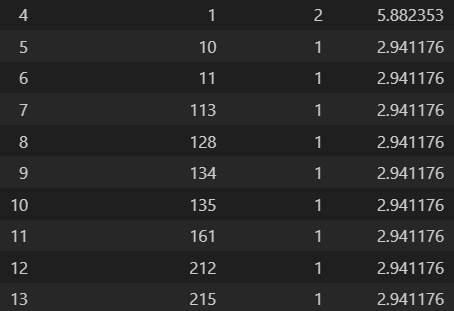

En la observación 4; tenemos 2 variables que contienen 1 valor faltante, en la observación 8; tenemos 1 variable que contiene 128 valores faltantes, así sucesivamente podemos seguir.

Así de está manera las variables pueden estar relacionadas y podemos comparar si ciertos valores faltantes provienen de las mismas observaciones.

De esta manera podemos hacer preguntas mucho más complejas y así continuar analizando **casos / observaciones / filas**, para comenzar a unir las piezas.

## Observaciones / Casos / Filas

In [12]:
#Obteniendo  un resumen
riskfactors_df.missing.missing_case_summary()

,case,n_missing,pct_missing
0,0,6,16.666667
1,1,6,16.666667
2,2,7,19.444444
3,3,12,33.333333
4,4,5,13.888889
...,...,...,...
240,240,6,16.666667
241,241,5,13.888889
242,242,3,8.333333
243,243,2,5.555556


Aquí podemos ver que tenemos una tabla con 3 columnas en donde: 
1. **case**: Representa el **número de fila / caso /observación**.
2. **n_missing**: Este nos dice cuantos valores faltantes hay dentro de la observación, es decir; el **número de columnas que tiene valores faltantes**.
3. **pct_missing**: Finalmente tenemos el porcentaje, que representa **el porcentaje total de los valores faltantes por cada observación con respecto al total de variables que existen dentro del DataFrame**

De igual manera como hicimos anteriormente con las columnas, vamos a tabular el número de coincidencias para agruparlas y ver si hay una relación entre los valores faltantes, las columnas y las observaciones.

### Agrupando

In [13]:
#Tabulando
riskfactors_df.missing.missing_case_table()

,n_missing_in_case,n_cases,pct_case
0,4,49,20.000000
1,5,45,18.367347
2,7,39,15.918367
3,6,36,14.693878
4,2,31,12.653061
5,3,30,12.244898
6,1,4,1.632653
7,8,3,1.224490
8,12,3,1.224490
9,15,2,0.816327


Nos entrega un resultado en el cual podemos ver que tenemos 3 columnas:

1. **n_missing_in_case**: Nos da el número de valores faltantes dentro de cada **caso / observación / fila**.
2. **n_cases**: Nos da el número total de incidencias con respecto de las **observaciones / casos /filas** que coinciden con el mismo número de valores faltantes.
3. **pct_case**: Por último nos da el porcentaje total que representa cada observación con respecto del total de observaciones con valores faltantes.

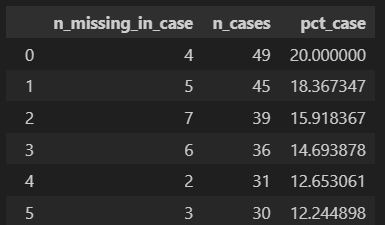

Podemos ver que en la tabla anterior que en la observación 0: tenemos **49** filas / observaciones con 4 valores faltantes, que a su vez representa un 20% del total de valores faltantes de **observaciones**.

Otro ejemplo en la observación 5; tenemos **30** filas / observaciones con 3 valores faltantes y a su vez representan el 12.24% del total de valores faltantes.

Es muy importante porque podemos analizar y explorar si existe un lugar en donde los valores faltantes  se estén acumulando, para tratar de entender que sucede con nuestros datos.

Vayamos un poco más a fondo.

## Intervalos de valores faltantes

In [19]:
(
    riskfactors_df
    .missing
    .missing_variable_span(
        variable='weight_lbs',
        span_every = 50
    )
)

,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,1,49,2.000000,98.000000
1,1,5,45,10.000000,90.000000
2,2,1,49,2.000000,98.000000
3,3,1,49,2.000000,98.000000
4,4,2,43,4.444444,95.555556


**Span** es **un bloque**, lo que vamos a contar es: en el primer bloque ¿cuantos valores faltantes tengo?¿cuantos valores completos tengo?,de tal manera que puedo identificar si en alguna parte de nuestro conjunto de datos se están acumulando valores faltantes o no.

Este método recibe 2 parámetros:
1. **variable**: La variable que queremos analizar o agrupar.
2. **span_every**: Nos permite agrupar cada tanto o cantidad.

Entonces el bloque de código anterior significa que vamos a romper nuestro conjunto de datos en bloques de 50 filas cada uno y vamos a saber cuantos valores completos y faltantes existen en cada bloque

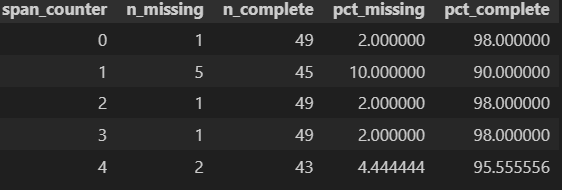

* **span_counter**: Me dice el número de número de paquete al que pertenece la observación.
* **n_missing**: Me da el número total de valores faltantes dentro del paquete segmentado.
* **n_complete**: Me da el número total de observaciones que están completas o sin valor faltante.
* **pct_missing**: Me dice el porcentaje de valores faltantes con respecto del número total de observaciones dentro del paquete.
* **pct_complete**: Me da el porcentaje de valores completos con respecto del número total de observaciones dentro del paquete.

Podríamos seguir así con el **span**, para saber si dentro de una parte de mi conjunto hay valores faltantes que se estén acumulando.

In [20]:
#Run length
riskfactors_df.missing.missing_variable_run(variable='weight_lbs')

,run_length,is_na
0,14,complete
1,1,missing
2,45,complete
3,1,missing
4,5,complete
5,1,missing
6,12,complete
7,1,missing
8,10,complete
9,2,missing


Lo ejecutamos y tenemos 2 columnas:
* **run_length**
* **is_na**

**is_na** quiere decir si la variable es nula o no.


Primero tenemos **14** observaciones con **valores o completos**, después tenemos **1** observación que no tiene valor, seguido de **45** observaciones que si tienen valor y así sucesivamente.

Con esto vamos a encontrar ciertos comportamientos en donde veamos que mis valores faltantes se puedan acumular. Así estos picos vana a resultar en mi interés, porque podremos acercarnos a saber que algo altero el comportamiento de mis datos y así detectar que no estamos teniendo estos valores faltantes.